In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,41.5,20.0,186,3450,NaN
4,Adelie,Torgersen,36.7,19.3,193,3450,female


In [3]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
339,Chinstrap,Dream,55.8,19.8,207,4000,male
340,Chinstrap,Dream,43.5,18.1,202,3400,female
341,Chinstrap,Dream,49.6,18.2,193,3775,male
342,Chinstrap,Dream,50.8,19.0,210,4100,male
343,Chinstrap,Dream,50.2,18.7,198,3775,female


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
Gender               11
dtype: int64

In [5]:
df=df.dropna()

In [6]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [7]:
df=df.drop(['species','island'],axis=1)

In [8]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Gender
0,39.1,18.7,181,3750,1
1,39.5,17.4,186,3800,0
2,40.3,18.0,195,3250,0
4,36.7,19.3,193,3450,0
5,39.3,20.6,190,3650,1


In [9]:
X=df[['bill_length_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
Y=df['Gender']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
logreg=linear_model.LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [12]:
pred=logreg.predict(X_test)
pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1])

In [13]:
cnf_matrix=metrics.confusion_matrix(Y_test,pred)
cnf_matrix

array([[31,  7],
       [ 6, 23]], dtype=int64)

<Axes: >

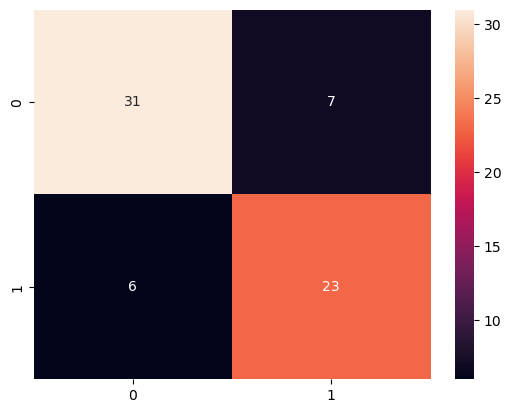

In [14]:
sns.heatmap(cnf_matrix,annot=True)

<Axes: >

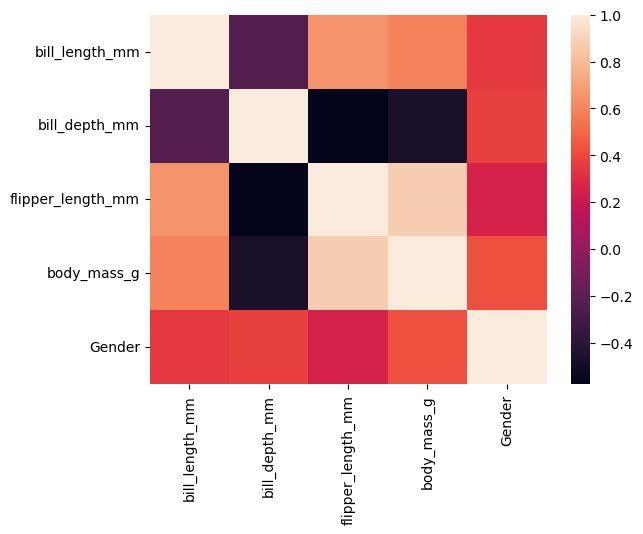

In [15]:
sns.heatmap(df.corr())

In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
print("Precision:",metrics.precision_score(Y_test, pred))
print("Recall:",metrics.recall_score(Y_test, pred))

Accuracy: 0.8059701492537313
Precision: 0.7666666666666667
Recall: 0.7931034482758621


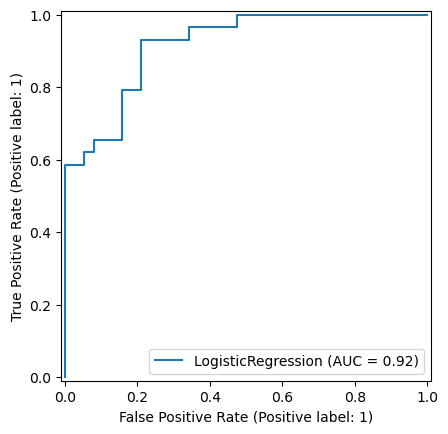

In [17]:
RocCurveDisplay.from_estimator(logreg,X_test,Y_test)
plt.show()

In [19]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        38
           1       0.77      0.79      0.78        29

    accuracy                           0.81        67
   macro avg       0.80      0.80      0.80        67
weighted avg       0.81      0.81      0.81        67

